#CMPE 258 HW3 - Part C3
Pure tensorflow to build neural network of 3d input, 2d output with high level primitives

Abhishek Bais

In [108]:
# Import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generate 3d input, 2d output

In [109]:
# Generate 3-d input, 2d output
n = 100
d = 3
x = tf.random.uniform((n, d), -1, 1)

# y = 5x^2 + wx + b
weights_true = tf.constant([[3., 2., -1.], [2., 3., 1.]])
bias_true = tf.constant([[0.5], [0.5]])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = tf.matmul((5 * x ** 2), weights_true, transpose_b=True) + tf.matmul(x, weights_true, transpose_b=True) + tf.transpose(bias_true)
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

print('x is: ' + str(x[:2]))
print('y is: ' + str(y_true[:2]))

(100, 3) (2, 3) (2, 1)
x: (100, 3), weights: (2, 3), bias: (2, 1), y: (100, 2)
x is: tf.Tensor(
[[-0.6966808  -0.7894263  -0.94202304]
 [-0.17719889 -0.98703575  0.85664773]], shape=(2, 3), dtype=float32)
y is: tf.Tensor(
[[ 6.848491 14.434922]
 [ 3.681845 16.637957]], shape=(2, 2), dtype=float32)


# Generate a 3d TSNE plot of the data

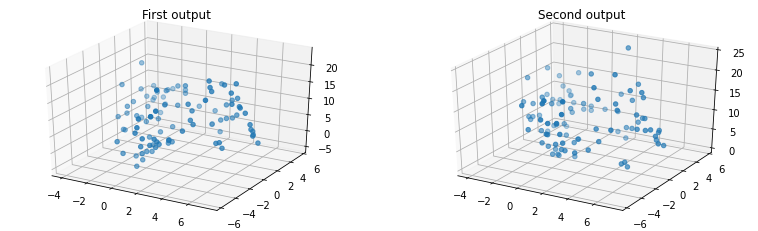

In [110]:
# Generate 3D TSNE plots for both outputs
def plot_3d(X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)
  fig = plt.figure(figsize=plt.figaspect(0.3))
  
  # plot the first output y[:,0]
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,0], label='y_true')
  ax.set_title("First output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,0], label='y_pred', marker='v')
  
  # plot the second output y[:,1]
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,1], label='y_true')
  ax.set_title("Second output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,1], label='y_pred', marker='v')
  
plot_3d(x, y_true)

# Build the nueral net

In [126]:
# Custom Model using tf.keras.Model
class Model(tf.keras.Model):
  # Dump NN
  def dump(self):
    print('Builiding NN:')
    for j, layer in enumerate(self.layers_):
      print('---- Layer {} ----'.format(j))
      print(layer)
      print('Activation', layer.activation)
  
  # Init
  def __init__(self, ni=3, nh=5, no=2, activation='Linear'):
    super(Model, self).__init__()
    self.ni = ni
    self.nh = nh
    self.no = no
    
    self_layers = []
    self_layers.append(Dense(nh))
    if (activation != 'Linear'):
      self_layers.append(Dense(ni, activation=activation))
    else:
      self_layers.append(Dense(ni))
    if (activation != 'Linear'):
      self_layers.append(Dense(no, activation=activation))
    else:
      self_layers.append(Dense(no))
    self.layers_ = self_layers

  # Dump the model created
    self.dump()

  # Forward propagate
  def forward(self, input):
    o = input
    for l in self.layers_:
      o = l(o)
    return o
  
  # Train model
  def fit(self, x, y_true, lr, epochs):
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    loss_fn  = tf.keras.losses.MeanSquaredError()
    for epoch in range(epochs):
      with tf.GradientTape(persistent=True) as tape:
        y_pred = self.forward(x)
        loss = loss_fn(y_pred, y_true)
        print(loss)

      for layer in self.layers_:
        gradients = tape.gradient(loss, layer.trainable_weights)
        optimizer.apply_gradients(zip(gradients, layer.trainable_weights))

# Train neural net with non-linear relu layer

In [127]:
# Configure hyperparams of model
num_epochs = 40
lr = 0.01
ni = x.shape[1]
no = y_true.shape[1]
#nh = [5,3]
nh=5

In [133]:
nn = Model(ni, nh, no, activation='relu')
nn.fit(x, y_true, lr, num_epochs)
y_pred = nn.forward(x)

loss = mean_squared_error(y_true, y_pred)
print('Final Loss is ', loss)

Builiding NN:
---- Layer 0 ----
Activation <function linear at 0x7f5f43958710>
---- Layer 1 ----
Activation <function relu at 0x7f5f43958050>
---- Layer 2 ----
Activation <function relu at 0x7f5f43958050>
tf.Tensor(102.53976, shape=(), dtype=float32)
tf.Tensor(101.947205, shape=(), dtype=float32)
tf.Tensor(100.93436, shape=(), dtype=float32)
tf.Tensor(99.10957, shape=(), dtype=float32)
tf.Tensor(96.59027, shape=(), dtype=float32)
tf.Tensor(93.497375, shape=(), dtype=float32)
tf.Tensor(89.78764, shape=(), dtype=float32)
tf.Tensor(85.26437, shape=(), dtype=float32)
tf.Tensor(79.2638, shape=(), dtype=float32)
tf.Tensor(70.79486, shape=(), dtype=float32)
tf.Tensor(61.072433, shape=(), dtype=float32)
tf.Tensor(50.815075, shape=(), dtype=float32)
tf.Tensor(41.6786, shape=(), dtype=float32)
tf.Tensor(35.407455, shape=(), dtype=float32)
tf.Tensor(32.180668, shape=(), dtype=float32)
tf.Tensor(30.66471, shape=(), dtype=float32)
tf.Tensor(29.760056, shape=(), dtype=float32)
tf.Tensor(29.090714, s

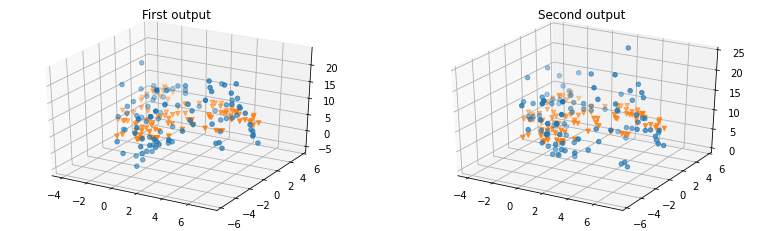

In [135]:
plot_3d(x, y_true, y_pred)

# Train neural net with only linear layers

In [136]:
nn = Model(ni, nh, no, activation='Linear')
nn.fit(x, y_true, lr, num_epochs)
y_pred = nn.forward(x)

loss = mean_squared_error(y_true, y_pred)
print('Final Loss is ', loss)

Builiding NN:
---- Layer 0 ----
Activation <function linear at 0x7f5f43958710>
---- Layer 1 ----
Activation <function linear at 0x7f5f43958710>
---- Layer 2 ----
Activation <function linear at 0x7f5f43958710>
tf.Tensor(104.16111, shape=(), dtype=float32)
tf.Tensor(101.74396, shape=(), dtype=float32)
tf.Tensor(99.452385, shape=(), dtype=float32)
tf.Tensor(97.182205, shape=(), dtype=float32)
tf.Tensor(94.8493, shape=(), dtype=float32)
tf.Tensor(92.37514, shape=(), dtype=float32)
tf.Tensor(89.67793, shape=(), dtype=float32)
tf.Tensor(86.66695, shape=(), dtype=float32)
tf.Tensor(83.23997, shape=(), dtype=float32)
tf.Tensor(79.28588, shape=(), dtype=float32)
tf.Tensor(74.69661, shape=(), dtype=float32)
tf.Tensor(69.396805, shape=(), dtype=float32)
tf.Tensor(63.4006, shape=(), dtype=float32)
tf.Tensor(56.896774, shape=(), dtype=float32)
tf.Tensor(50.32716, shape=(), dtype=float32)
tf.Tensor(44.35584, shape=(), dtype=float32)
tf.Tensor(39.615543, shape=(), dtype=float32)
tf.Tensor(36.335228, 

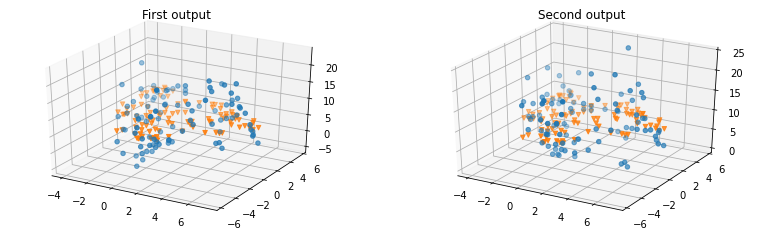

In [137]:
plot_3d(x, y_true, y_pred)